-------

#### importing  libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="direction:rtl"> 
<h2>הקדמה</h2><br>
</a> <br>
הדאטה סט שבחרנו  מציג את הערכת רמות ההשמנה על נבדקים ממקסיקו, פרו וקולומביה, בהתבסס על הרגלי התזונה , הצריכה  ומצבם הגופני. <br>
<br>
הערות: <br>
    <li> נתונים אלה נאספו באמצעות סקר, וחלק מהנתונים חושבו ע"י WEKA (אוסף אלגוריתמים של למידת מכונות) על מנת ליצור רשומות חדשות  
    <li> הערכים בעלי מספר ספרות אחרי הנקודה הם הנתונים שחושבו על ידי המכונה, והערכים השלמים הם הנתונים המקוריים. 
    <li> מדד ה-BMI אשר מורכב מהמשתנים גובה ומשקל, מסווג את האנשים לקבוצות המשקל השונות 
</ul><br>
<br>
<a href="https://www.kaggle.com/ankurbajaj9/obesity-levels?select=ObesityDataSet_raw_and_data_sinthetic.csv">Link to the data source</a>
<br>
הנתונים נלקחו מהאתר הבא: 
אנו קוראים את הנתונים ממאגר github
</div>


-------------------------------

<div style="direction:rtl"> 
<h5>קריאת הקובץ</h5>
</div>

In [2]:
ob_df=pd.read_csv("https://raw.githubusercontent.com/Lirazsitru/DS_FinalProject2021/main/ObesityDataSet_raw_and_data_sinthetic.csv")

<div style="direction:rtl"> 
<h5>הצגת חלק מהמידע המחושב ע"י המכונה </h5>
</div>

In [3]:
ob_df.tail(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III



<div style="direction:rtl"> 
<h5>חיפוש אחר ערכים חסרים ובדיקת סוגי העמודות :</h5>
</div>

In [4]:
data_fix=ob_df.isnull().sum().to_frame().rename(columns={0: "Nan values"})
dtype=ob_df.dtypes.to_dict()
data_fix["Dtype"]=dtype.values()
data_fix

,Nan values,Dtype
Gender,0,object
Age,0,float64
Height,0,float64
Weight,0,float64
family_history_with_overweight,0,object
FAVC,0,object
FCVC,0,float64
NCP,0,float64
CAEC,0,object
SMOKE,0,object


----------

<div style="direction:rtl"> 
<h2>1. הכנת הדאטה</h2>
    <h5> סידור וארגון הדאטה: </h5>
    1. טיפול בשמות עמודות <br>
    2. טיפול בסוגי דאטה <br>
    3. עיגול ערכים <br>
    4. המרת עמודות מסויימות לערכים בינאריים  <br>
    5. ארגון העמודות במערך הנתונים <br>
</div>




In [5]:
if ob_df.columns[6]=='FCVC':
   # (1) Changing the column names :

  col_change={'FAVC':'Consume_high_calorie','FCVC':'Consumption_of_vegetables','NCP':'Num_of_meals','CAEC':'Consumption_of_food_between_meals','CH2O':'Consumption_of_water','SCC':'Calories_monitoring','FAF':'Pysical_activity_frequency','TUE':'Time_using_technology_devices','MTRANS':'Transportation_used','CALC':"Alcohol_consume", "NObeyesdad":"BMI"}   
  ob_df.rename(columns = col_change, inplace = True)

  # (2) Converting object/text variables to category variables:
  
  columns = ["Gender", "family_history_with_overweight", "Consume_high_calorie", "Consumption_of_food_between_meals", "SMOKE", "Calories_monitoring", "Alcohol_consume", "Transportation_used", "BMI"]
  for col in columns:
      ob_df[col] = ob_df[col].astype('category')
  ob_df[['Age','Consumption_of_vegetables','Num_of_meals']] = ob_df[['Age','Consumption_of_vegetables','Num_of_meals']].astype(int)    

  
  # (3)Rounding Height and Weight values:

  ob_df[['Height','Weight','Time_using_technology_devices']]=ob_df[['Height','Weight','Time_using_technology_devices']].round(2)
  ob_df[['Consumption_of_water']]=ob_df[['Consumption_of_water']].round(1)

  #(4) Converting relevant column to binary :
  yes_no=["family_history_with_overweight","Consume_high_calorie",'SMOKE',"Calories_monitoring"]
  for i in yes_no:
    ob_df[""+i+""].replace(('yes', 'no'), (1, 0), inplace=True)

  #(5) Organize the columns : 
  ob_df=ob_df[['Gender', 'Age', 'Height', 'Weight', 'BMI','Consumption_of_vegetables','Num_of_meals','Consumption_of_water','Pysical_activity_frequency','Time_using_technology_devices',
            'Consumption_of_food_between_meals','Alcohol_consume', 'Transportation_used','family_history_with_overweight','Consume_high_calorie','SMOKE','Calories_monitoring']]


<div style="direction:rtl"> 
<h5>נסתכל על הנתונים לאחר השינוי</h5>
</div>

In [6]:
ob_df.tail(3)

,Gender,Age,Height,Weight,BMI,Consumption_of_vegetables,Num_of_meals,Consumption_of_water,Pysical_activity_frequency,Time_using_technology_devices,Consumption_of_food_between_meals,Alcohol_consume,Transportation_used,family_history_with_overweight,Consume_high_calorie,SMOKE,Calories_monitoring
2108,Female,22,1.75,133.69,Obesity_Type_III,3,3,2.1,1.414209,0.65,Sometimes,Sometimes,Public_Transportation,1,1,0,0
2109,Female,24,1.74,133.35,Obesity_Type_III,3,3,2.9,1.139107,0.59,Sometimes,Sometimes,Public_Transportation,1,1,0,0
2110,Female,23,1.74,133.47,Obesity_Type_III,3,3,2.9,1.026452,0.71,Sometimes,Sometimes,Public_Transportation,1,1,0,0


--------------------

<div style="direction:rtl"> 
<h2>2. הבנת הדאטה</h2>
</div>

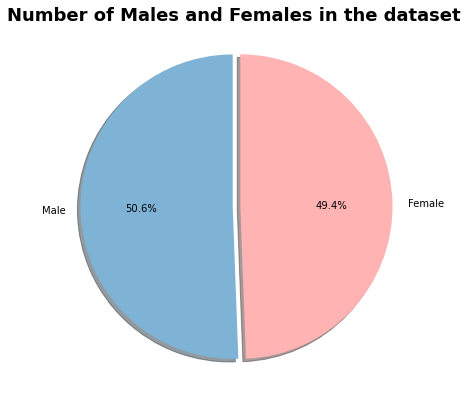

In [7]:
labels = ob_df.Gender.value_counts().index
sizes = ob_df.Gender.value_counts().values
colors = ["#7FB3D5","#ffb3b3"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.suptitle("Number of Males and Females in the dataset",y=0.9, size=18, weight='bold')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

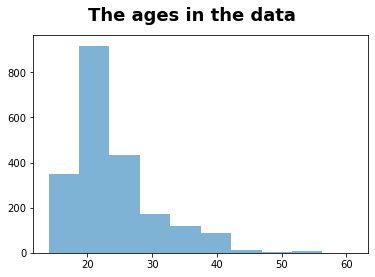

In [8]:
plt.hist(ob_df["Age"],color="#7FB3D5")
plt.suptitle("The ages in the data ", size=18, weight='bold')
plt.show()

<div style="direction:rtl"> 
אנו רואים שרוב הנשאלים שלנו הם צעירים בגילאי 20-30 <br>
 <br> 
</div>






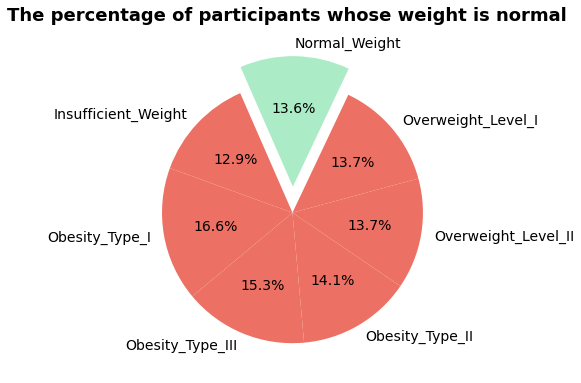

In [9]:
labels = ob_df.BMI.value_counts().index
sizes = ob_df.BMI.value_counts().values
colors=["#EC7063","#EC7063","#EC7063","#EC7063","#EC7063","#ABEBC6"]
explode=[0,0,0,0,0,0.2,0]

plt.figure(figsize=(6,6))
plt.suptitle("The percentage of participants whose weight is normal", size=18, weight='bold')
plt.pie(sizes, explode=explode,labels=labels,startangle=-200, colors=colors,autopct="%1.1f%%",textprops={'fontsize': 14})

plt.show()

<div style="direction:rtl"> 
בתרשימים המוצגים מעלה ראינו שהדאטה מחולק באופן כמעט שווה בין גברים ונשים, 50.6% גברים מול 49.4% נשים <br> 
אחוז האנשים שנמצאים בטווח המשקל הנורמלי עומד על 13.6% מכלל הנבדקים <br>
נתון זה הינו נתון מדאיג ומעורר תהיות בנוגע לאורח החיים של הנבדקים במדינות אלו <br> 
</div>








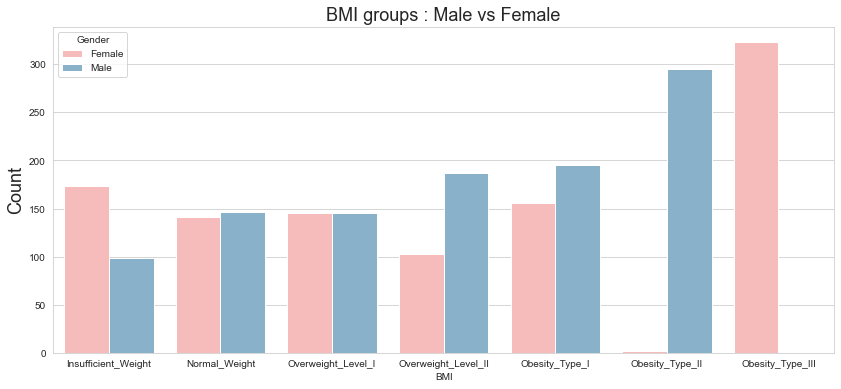

In [10]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
sns.countplot(x='BMI',data=ob_df,hue='Gender',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II' ,
    'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'],palette=["#ffb3b3","#7FB3D5"])
plt.ylabel('Count',fontsize=18)
plt.title('BMI groups : Male vs Female',fontsize=18)
plt.show()

<div style="direction:rtl"> 
לאחר שקיבלנו תמונה כללית על חלוקת הדאטה לפי מגדר וסוג השמנה, <br> 
ניתן לראות שיש הבדל מהותי בין גברים לנשים בהשמנת יתר מסוג 2 לבין סוג 3:  <br>
<li> אין גברים המשתייכים להשמנת יתר מסוג 3 בקרב הנבדקים <br>
<li> מספר הנשים המשתייכות להשמנת יתר מסוג 2 הוא הנמוך ביותר מכלל קבוצות ההשמנה, לעומת מספר הגברים המשייכים לקבוצה זו שהוא הגבוהה ביותר <br>
<li> מספר הנשים המשתייכות להשמנת יתר מסוג 3 הוא הגבוהה ביותר מכלל קבוצות ההשמנה, לעומת מספר הגברים המשתייכים לקבוצה זו שהוא הנמוך ביותר <br>
 <br>
 לסיכום, ניתן לראות שיש היפוך בין הנשים לגברים בהשמנת יתר מסוג 2 וסוג 3 <br> 
</div>





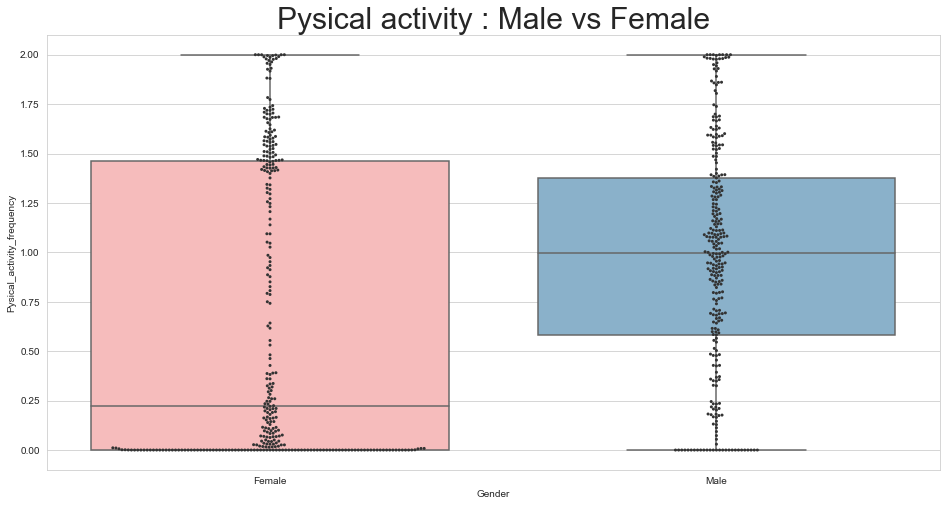

In [11]:
type_2_3=ob_df[(ob_df.BMI=='Obesity_Type_II')|(ob_df.BMI=='Obesity_Type_III')]
plt.figure(figsize=(16,8))
plt.title('Pysical activity : Male vs Female',fontsize=30)
sns.boxplot(x="Gender", y="Pysical_activity_frequency", data=type_2_3,palette=["#ffb3b3","#7FB3D5"])
sns.swarmplot(x="Gender", y="Pysical_activity_frequency", color=".20" ,data=type_2_3, size=3)
plt.show()

<div style="direction:rtl"> 
ניתן לראות מהסתכלות על החציון, שתדירות הפעילות הספורטיבית אצל גברים גבוהה יותר מאשר אצל נשים, <br> 
כמו כן, פיזור הנקודות אצל נשים בחלק התחתון של התרשים הוא גדול יותר, דבר שמחזק את זה שתדירות הפעילות הספורטיבית של נשים הינה נמוכה יותר    <br> 
ולכן דבר זה יכול להסביר מדוע גברים משתייכים להשמנת יתר מסוג 2 ולא לסוג 3 שאליו משתייכות רק נשים <br>
</div>


----


<div style="direction:rtl"> 
    <h3>  הסבר ראשון אפשרי עבור ההבדל בין קבוצות ה-BMI השונות </h3>
</div>



<div style="direction:rtl"> 
מהו BMI? <br> 
BMI הוא מדד מסת הגוף <br>
מדד זה נותן הערכה כמותית האם אדם נמצא במשקל תקין, בעודף משקל או בתת משקל <br>
המדד מחושב באמצעות נתוני הגובה (במטרים) והמשקל (בק"ג) <br> 
</div>

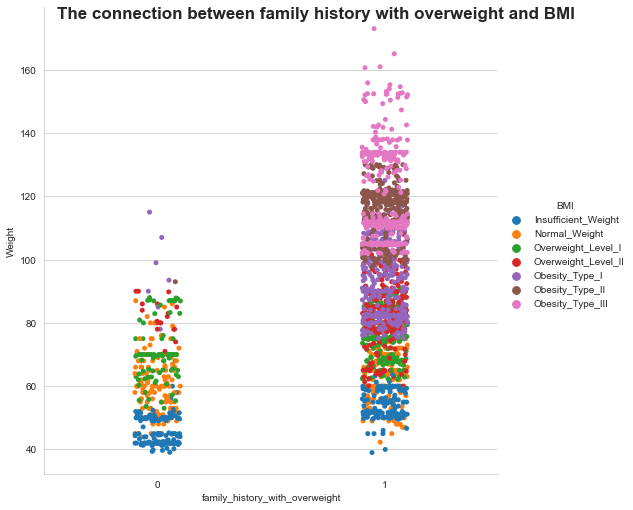

In [12]:
sns.catplot(x="family_history_with_overweight", y="Weight", hue="BMI", hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II' ,
    'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'], data=ob_df,height=7)
plt.suptitle('The connection between family history with overweight and BMI', size=17, weight='bold')
plt.show()

<div style="direction:rtl">    
 ניתן לראות שבהכרח יש קשר בין היסטוריית ההשמנה המשפחתית לבין סוג ההשמנה הנוכחי של הנבדקים בקבוצות הבאות: <br>
 <li> Overweight_Level_II <br>
 <li> Obesity_Type_I <br>
 <li> Obesity_Type_II <br>
 <li> Obesity_Type_III <br>
</div>
 

In [13]:
fat=ob_df[(ob_df.BMI!='Normal_Weight')&(ob_df.BMI!='Insufficient_Weight')]
normal=ob_df[ob_df.BMI=='Normal_Weight']

In [14]:
chance = (1-fat[fat.family_history_with_overweight==1].shape[0]/fat.shape[0])*100
round2 = "{:.2f}".format(chance)
print(("הסיכוי שאדם בעל היסטוריית השמנה משפחתית ישתייך לקבוצת משקל נורמלי עומד על:"),round2)

הסיכוי שאדם בעל היסטוריית השמנה משפחתית ישתייך לקבוצת משקל נורמלי עומד על: 6.89


-----

<div style="direction:rtl"> 
    <h3> הסבר שני אפשרי עבור ההבדל בין קבוצות ה-BMI השונות </h3>
</div>


 

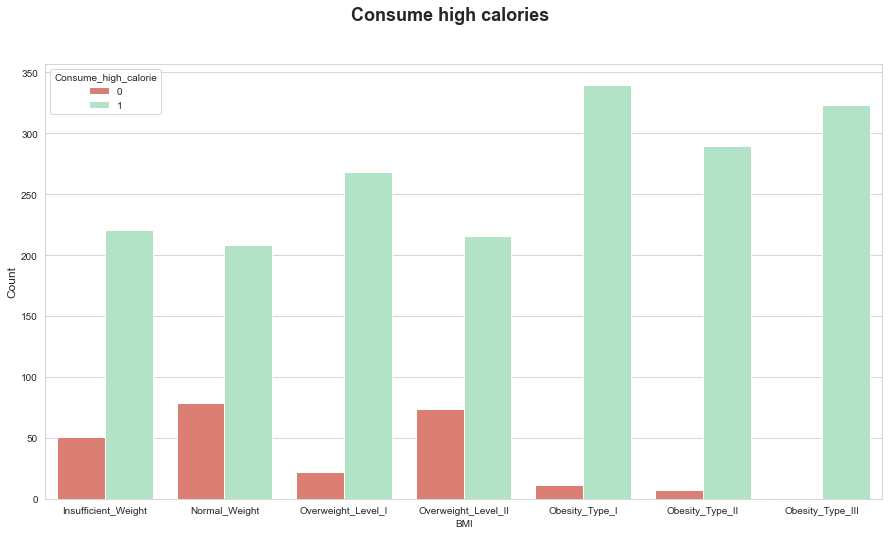

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(x='BMI',data=ob_df ,palette=["#EC7063","#ABEBC6"],hue='Consume_high_calorie',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II' ,
    'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.ylabel('Count',fontsize=12)
plt.suptitle('Consume high calories', size=18, weight='bold')
plt.show()


<div style="direction:rtl"> 
מהתבוננות בגרף ניתן לראות כי כלל קבוצות ה-BMI צורכות מאכלים עתירי קלוריות בתדירויות גבוהות. <br> 
דבר היכול להעיד שצריכת מאכלים עתירי קלוריות בתדירויות גבוהות היא לא הסיבה להבדלים בהשתייכות לקבוצות ה - BMI <br> 
לכן, בדקנו עוד אפשרות להבדל בשיוך הנבדקים לקבוצות ה - BMI השונות בעזרת גרף ניטור קלוריות  <br>
</div>



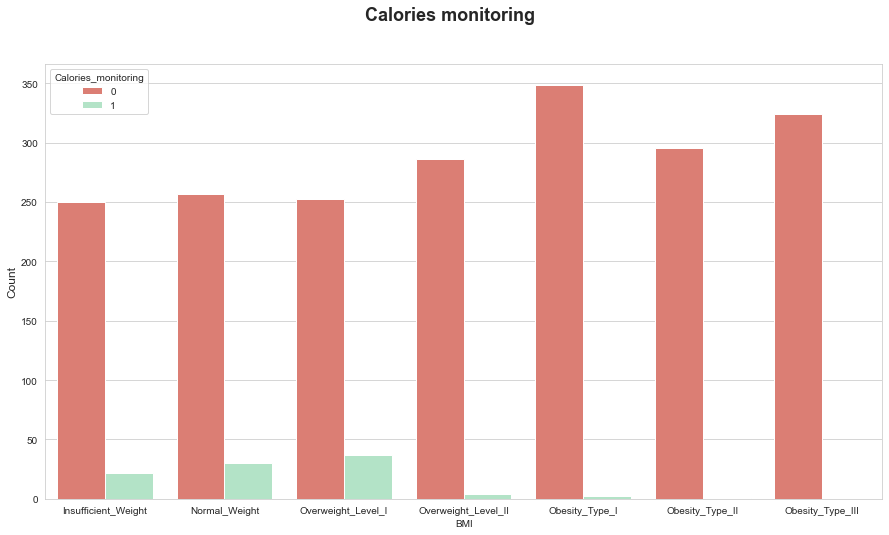

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(x='BMI',data=ob_df ,palette=["#EC7063","#ABEBC6"],hue='Calories_monitoring',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II' ,
    'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.ylabel('Count',fontsize=12)
plt.suptitle('Calories monitoring', size=18, weight='bold')
plt.show()

<div style="direction:rtl"> 
הגרף מציג את ניטור הקלוריות על פי קבוצות ה-BMI השונות,  <br> 
ניתן לראות שהניטור אחר קלוריות קיים רק בחלק מן הקבוצות ושרמת הניטור הגבוהה ביותר היא בקבוצת Overweight_Level_I 
 <br> 
השערה שיכולה להסביר דבר זה הינה שקבוצה זו נמצאת בטווח שבין Overweight_Level_II לבין משקל תקין <br>
השערה זו יכולה להעיד על זה שלנבדקים מקבוצה זו יש מוטיבציה לחזור למשקלם התקין לעומת קבוצות עם BMI גבוהה יותר שככה"נ התרגלו למשקלם   
</div>


-----------------

<div style="direction:rtl"> 
    <h3> בדיקת קורלציית ספירמן עבור גברים ונשים </h3>
</div>


 

In [17]:
##--> creating separated Df for male and female :

female=ob_df[ob_df.Gender=="Female"]
male=ob_df[ob_df.Gender=="Male"]

## --> creating spearman correlation : 
male_corr=male.corr("spearman")
female_corr=female.corr("spearman")

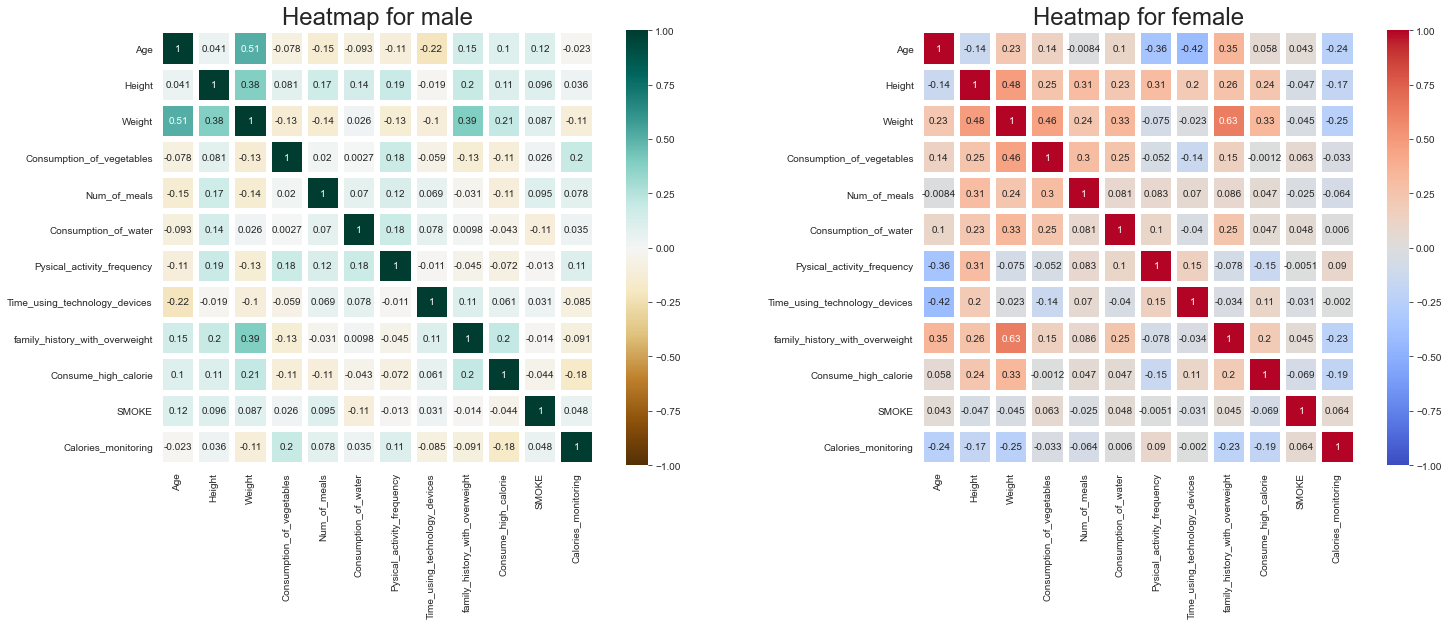

<Figure size 864x720 with 0 Axes>

In [18]:
fig,ax=plt.subplots(1,2,figsize=(25,8))
plt.figure(figsize=(12,10))
sns.heatmap(male_corr,annot=True,square=True,center=0,vmin=-1,vmax=1,cmap='BrBG',linewidths=5,ax=ax[0])
ax[0].set_title('Heatmap for male',fontsize=24)
sns.heatmap(female_corr,annot=True,square=True,center=0,vmin=-1,vmax=1,cmap='coolwarm',linewidths=5,ax=ax[1])
ax[1].set_title('Heatmap for female',fontsize=24)
plt.show()

<div style="direction:rtl">    
מפת החום הראשונה מציגה את הקורלציות אצל הגברים ומפת החום השנייה מציגה את הקורלציות אצל הנשים. <br>
הגוון של הצבע מעיד על חוזק הקורולציה וניתן לראות שהקורלציה הכי חזקה היא גובה ומשקל. <br> 
</div>



<div style="direction:rtl"> 
לאחר שלא מצאנו קשרים חזקים , הדבר הבא שמתבקש לבדוק הוא האם יש קשר התנהגותי בין האנשים שנמצאים תחת אותה קבוצת   BMI 
 <br>    
</div>

In [19]:
ob_df.groupby("BMI").corr()

Age    Height  \
BMI                                                                      
Insufficient_Weight Age                             1.000000 -0.230471   
                    Height                         -0.230471  1.000000   
                    Weight                         -0.112378  0.916772   
                    Consumption_of_vegetables       0.253957 -0.074720   
                    Num_of_meals                   -0.045127  0.724415   
...                                                      ...       ...   
Overweight_Level_II Time_using_technology_devices  -0.395740 -0.138555   
                    family_history_with_overweight -0.107016 -0.006587   
                    Consume_high_calorie            0.328653  0.586567   
                    SMOKE                           0.091194 -0.017567   
                    Calories_monitoring            -0.013057  0.034709   

                                                      Weight  \
BMI                                                            
Insufficient_Weight Age                            -0.112378   
                    Height                          0.916772   
                    Weight                          1.000000   
                    Consumption_of_vegetables      -0.010637   
                    Num_of_meals                    0.685202   
...                                                      ...   
Overweight_Level_II Time_using_technology_devices  -0.109690   
                    family_history_with_overweight  0.003799   
                    Consume_high_calorie            0.575581   
                    SMOKE                          -0.010757   
                    Calories_monitoring             0.012824   

                                                    Consumption_of_vegetables  \
BMI                                                                             
Insufficient_Weight Age                                              0.253957   
                    Height                                          -0.074720   
                    Weight                                          -0.010637   
                    Consumption_of_vegetables                        1.000000   
                    Num_of_meals                                    -0.180796   
...                                                                       ...   
Overweight_Level_II Time_using_technology_devices                   -0.215526   
                    family_history_with_overweight                  -0.278311   
                    Consume_high_calorie                            -0.115466   
                    SMOKE                                            0.099946   
                    Calories_monitoring                              0.114122   

                                                    Num_of_meals  \
BMI                                                                
Insufficient_Weight Age                                -0.045127   
                    Height                              0.724415   
                    Weight                              0.685202   
                    Consumption_of_vegetables          -0.180796   
                    Num_of_meals                        1.000000   
...                                                          ...   
Overweight_Level_II Time_using_technology_devices       0.205480   
                    family_history_with_overweight     -0.118565   
                    Consume_high_calorie               -0.051002   
                    SMOKE                               0.090846   
                    Calories_monitoring                 0.109284   

                                                    Consumption_of_water  \
BMI                                                                        
Insufficient_Weight Age                                         0.054246   
                    Height                                      0.309431   
                  

<div style="direction:rtl">    
לאחר התבוננות במספרים ובקשרים שבטבלה ומכיוון שלא נמצאו ממצאים מספיק מעניינים שחידשו את מה שגילינו עד כה, התקבלה החלטה להמשיך לנתח את הדאטה כרגיל <br> <br> 
</div>



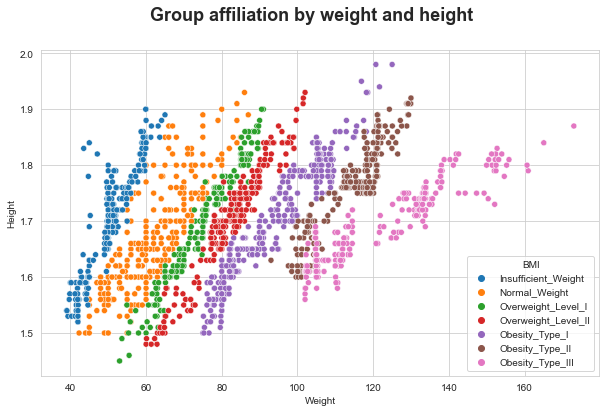

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=ob_df, x="Weight", y="Height", hue="BMI",hue_order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II' ,
    'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.suptitle('Group affiliation by weight and height', size=18, weight='bold')

plt.show()

<div style="direction:rtl">  
 הגרף מציג השתייכות לקבוצות ה-BMI השונות לפי המדדים המרכיבים אותן שהם משקל וגובה <br>
ניתן לראות שהקבוצות מוצגות כקווים עולים, בעלי שיפוע חיובי  <br> 
</div>


<div style="direction:rtl">  
חיפוש אחר קורלציות חזקות נוספות עבור נשים וגברים:
</div>



In [21]:
male_max=male_corr.unstack().sort_values(ascending=False).drop_duplicates()[1:].to_frame()[:2]
female_max=female_corr.unstack().sort_values(ascending=False).drop_duplicates()[1:][:2].to_frame()

display(male_max.rename(columns={0: "Spearman corr"}).style.set_caption("Men max correlation").set_table_styles([{'selector': 'caption','props': [('color', 'black'),('font-size', '16px')]}]))
print('\n\n')
display(female_max.rename(columns={0: "Spearman corr"}).style.set_caption("Female max correlation").set_table_styles([{'selector': 'caption','props': [('color', 'black'),('font-size', '16px')]}]))

,,Spearman corr
Age,Weight,0.513273
Weight,family_history_with_overweight,0.394411


,,Spearman corr
family_history_with_overweight,Weight,0.626416
Height,Weight,0.482454


<div style="direction:rtl">  
מהקורלציות המוצגות ניתן לראות כי משקל הנשים מושפע מההיסטוריה המשפחתית שלהם, בשונה ממשקל הגברים שמושפע מהגיל שלהם
</div>


---------------

<div style="direction:rtl"> 
<h2> חיזוי תוחלת חיים </h2>
</div>

<div style="direction:rtl">  
 ה - BMI הינו מדד אשר מספק כלי נוח להבנה של סיכונים בריאותיים אפשריים. <br>
 ה- BMI אינו מספק תמונה מלאה ומדוייקת של כלל הגורמים אשר משפיעים על המצב הבריאותי של הנבדק <br>  
לכן, הסתמכנו על מחקרים אשר חוזים את תוחלת חייו של אדם לפי ההרגלים שלו ובנינו נוסחה שתחשב זאת על מנת לקבל תמונה עתידית של מצבו הבריאותי <br> 
</div> 


In [22]:
# The impact of smoking,alcohol, diet, physical activityand stress on health and life expectancy.

# https://www.ices.on.ca/flip-publication/seven-years/files/assets/basic-html/index.html#1

In [23]:
data = {'שאלה':['SMOKE', 'Alcohol_consume', 'Consume_high_calorie', 'Pysical_activity_frequency','BMI','BMI','BMI','BMI'],
        'תשובה':["yes","yes","yes","when frequency smaller than 1","Overweight_Level_I+II","Obesity_Type_I+II","Obesity_Type_III","Insufficient_Weight"],
          'ההשפעה על אורך החיים בשנים':[-6,-1,-1,-1,-2,-4,-6,-4]}
df = pd.DataFrame(data)
df

,שאלה,תשובה,ההשפעה על אורך החיים בשנים
0,SMOKE,yes,-6
1,Alcohol_consume,yes,-1
2,Consume_high_calorie,yes,-1
3,Pysical_activity_frequency,when frequency smaller than 1,-1
4,BMI,Overweight_Level_I+II,-2
5,BMI,Obesity_Type_I+II,-4
6,BMI,Obesity_Type_III,-6
7,BMI,Insufficient_Weight,-4


In [24]:
ob_df["life_ex"]="0"

In [25]:
# mean life expentency:
# from- https://www.worldometers.info/demographics/life-expectancy/#:~:text=Countries%20ranked%20by%20life%20expectancy%20%20%20,%20%2082.42%20%2060%20more%20rows%20
#ממוצעי הנשים והגברים נלקחו מהאתר
female_mean= 79.62
male_mean= 74.22


<div style="direction:rtl"> 
לאחר שלקחנו את ממוצע תוחלת החיים של נשים וגברים במדינות אלו, בנינו נוסחא שחוזה תוחלת חיים של בנאדם לפי מספר משתנים: <br>
עישון, צריכת אלכוהול, צריכת מאכלים עתירי קלוריות, תדירות פעילות ספורטיבית וקבוצת ה-BMI  שהוא משתייך אליה <br>
<a href="https://www.projectbiglife.ca/life-expectancy-calculator">החישוב נלקח מהאתר בקישור הבא</a> <br>
לפי אורח החיים של הנבדק נוכל לחזות את תוחלת החיים העתידית שלו <br>  
</div>

In [26]:
list1=[]
life_exp=0
for i in range(0,2111):
    if ob_df.iloc[i,:].Gender=='Female':
      life_exp=female_mean
    else:
      life_exp=male_mean
    if ob_df.iloc[i,:].SMOKE==1:
      life_exp-= 6
    if ob_df.iloc[i,:].Alcohol_consume=='Frequently' or ob_df.iloc[i,:].Alcohol_consume=='Always':
      life_exp-=1
    if ob_df.iloc[i,:].Consume_high_calorie==1:
      life_exp-=1
    if ob_df.iloc[i,:].Pysical_activity_frequency<= 1.00:
      life_exp-=1
    if ob_df.iloc[i,:].BMI=='Overweight_Level_I' or ob_df.iloc[i,:].BMI=='Overweight_Level_II' :
      life_exp-=2
    if ob_df.iloc[i,:].BMI=='Obesity_Type_I' or ob_df.iloc[i,:].BMI=='Obesity_Type_II' :
      life_exp-=4
    if ob_df.iloc[i,:].BMI=='Obesity_Type_III' :   
      life_exp-=6
    if ob_df.iloc[i,:].BMI=='Insufficient_Weight' :  
      life_exp-=4
    list1.append(life_exp)

ob_df["life_ex"]=list1


In [27]:
ob_df=ob_df[['Gender', 'Age', 'Height', 'Weight', 'BMI','life_ex','Consumption_of_vegetables','Num_of_meals','Consumption_of_water',
             'Pysical_activity_frequency','Time_using_technology_devices','Consumption_of_food_between_meals',
             'Alcohol_consume', 'Transportation_used','family_history_with_overweight','Consume_high_calorie','SMOKE','Calories_monitoring']]

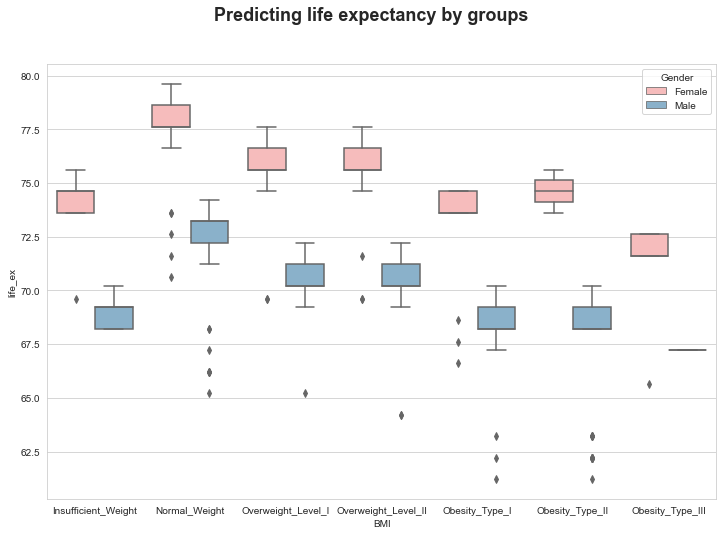

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(x='BMI', y='life_ex', data=ob_df,hue='Gender',order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II' ,
    'Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'],palette=["#ffb3b3","#7FB3D5"])
plt.suptitle('Predicting life expectancy by groups', size=18, weight='bold')
plt.show()

<div style="direction:rtl">  
בגרף זה מוצגות קבוצות ה-BMI השונות ותוחלת החיים הצפוייה לכל קבוצה <br>
<br>
 ניתן לראות שבכל קבוצת BMI תוחלת החיים של הנשים גבוהה יותר מאשר תוחלת החיים של הגברים <br>
</div>


In [29]:
##--> creating separated Df for male and female :

female_n=ob_df[ob_df.Gender=="Female"]
male_n=ob_df[ob_df.Gender=="Male"]

## --> creating spearman correlation : 
male_corr_n=male_n.corr("spearman")
female_corr_n=female_n.corr("spearman")

In [30]:
# Let's find the strongest correlation for men and female : 
male_max_n=male_corr_n.unstack().sort_values(ascending=True).drop_duplicates()[:].to_frame()[:2]
female_max_n=female_corr_n.unstack().sort_values(ascending=True).drop_duplicates()[:][:2].to_frame()

display(male_max_n.rename(columns={0: "Spearman corr"}).style.set_caption("Male max correlation").set_table_styles([{'selector': 'caption','props': [('color', 'black'),('font-size', '16px')]}]))
print('\n\n')
display(female_max_n.rename(columns={0: "Spearman corr"}).style.set_caption("Female max correlation").set_table_styles([{'selector': 'caption','props': [('color', 'black'),('font-size', '16px')]}]))

,,Spearman corr
Weight,life_ex,-0.560816
life_ex,Consume_high_calorie,-0.344662


,,Spearman corr
Weight,life_ex,-0.664805
Consumption_of_vegetables,life_ex,-0.466791


<div style="direction:rtl"> 
<h3> סיכום והצגת המסקנות </h3>
    1.  ראינו שהסיכוי של אדם בעל היסטוריית השמנה משפחתית להשתייך לקבוצות ההשמנה מסוג  Overweight_Level_II והילך הינו גבוה  <br>
    2. ראינו שצריכת מאכלים עתירי קלוריות היא לאו דווקא הסיבה להשתייכות לקבוצות בעלי BMI  גבוה <br>
    3. ראינו שניטור הקלוריות הגבוה ביותר נעשה ע"י קבוצת Overweight_Level_I  <br>
    השערה שיכולה להסביר דבר זה הינה שקבוצה זו נמצאת בטווח שבין קבוצת Overweight_Level_II לבין קבוצת משקל תקין. <br> השערה זו יכולה להעיד על זה שלנבדקים מקבוצה זו יש מוטיבציה לחזור למשקל התקין לעומת נבדקים מקבוצות BMI עם משקל גבוהה יותר שככה"נ התרגלו למשקלם 
   <br>
    4. ראינו שתוחלת החיים של נשים גבוהה יותר משל גברים למרות שהן עושות פעילות ספורטיבית בתדירות נמוכה יותר ושרק הן משתייכות לקבוצת ההשמנה החמורה ביותר (Obesity_Type_III)   <br>
    לאחר חיפושים מעמיקים באינטרנט מצאנו באתר "מכון דוידסון" שההסבר לכך הוא ככל הנראה ביולוגי וקשור להורמון הנשי אך עוד לא נמצא ההסבר החד משמעי לתשובה זו <br>
    5. ראינו שנבדקים אשר משתייכים לקבוצות משקל החריגות - תת משקל, ושלושת הרמות של השמנת יתר הם בעלי צפי לתוחלת חיים נמוכה יותר <br>
    6. ייתכן שהסבר נוסף לכך שלא ראינו הבדלים משמעותיים בהתנהגויות של הנבדקים מכלל הקבוצות נובע מכך שרוב הנבדקים הינם צעירים, אשר לרוב  פועלים ע"פ הסתכלות וחשיבה בטווח הקצר לעומת מבוגרים
</div>


